# 1. 라이브러리 및 데이터 로드

In [1]:
import os
os.getcwd()

'/content'

In [2]:
os.chdir('/home')
os.getcwd()

'/home'

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.utils as utils

In [4]:
U_obs_raw = pd.read_csv("./Data/ulsan_obs_data.csv",encoding='utf-8')
#U_fcst_raw = pd.read_csv("./Data/ulsan_fcst_data.csv",encoding='utf-8')
D_obs_raw = pd.read_csv("./Data/dangjin_obs_data.csv",encoding='utf-8')
#D_fcst_raw = pd.read_csv("./Data/dangjin_fcst_data.csv",encoding='utf-8')

In [5]:
ener_and_rad = pd.read_csv("./Data/energy+일사량join.csv", encoding='cp949')

# 2. 데이터 전처리

In [6]:
def data_preprocess (X, Y, place, var_list):
  dataset_X = X
  dataset_Y = Y
  if place == "ulsan":
    p = "경주일사"
  else:
    p = "서산일사"
  full_var_list = []
  full_var_list.extend(var_list)
  full_var_list.append(place)

  dataset_X["일시"] = pd.to_datetime(dataset_X["일시"])
  dataset_Y["time"] = pd.to_datetime(dataset_Y["time"])

  data4rad_obs_pd = pd.merge(dataset_X,dataset_Y[['time',place,p]],how='left',left_on='일시',right_on='time')
  data4rad_obs_pd["시간"] = data4rad_obs_pd["일시"].dt.hour #예측하는 시점의 '시'만 떼서 넣을 예정

  #8시에서 18시까지만
  day_idx1 = data4rad_obs_pd["시간"] >= 8
  day_idx2 = data4rad_obs_pd["시간"] <= 18
  data4rad_obs_pd = data4rad_obs_pd[day_idx1]
  data4rad_obs_pd = data4rad_obs_pd[day_idx2]
  for i in full_var_list:
    data4rad_obs_pd = data4rad_obs_pd[data4rad_obs_pd[i].notna()]
  
  for idx in full_var_list:
    print(idx,end=" : ")
    print(sum(data4rad_obs_pd[idx].isna()))

  print(len(data4rad_obs_pd))

  data4rad_obs_pd = data4rad_obs_pd[full_var_list]

  #되돌리기 용
  min_ = min(data4rad_obs_pd[place])
  max_ = max(data4rad_obs_pd[place])

  for i in full_var_list:
    min_x = min(data4rad_obs_pd[i])
    max_x = max(data4rad_obs_pd[i])
    diff_ = max_x - min_x

    data4rad_obs_pd[i] = data4rad_obs_pd[i]-min_x
    data4rad_obs_pd[i] = data4rad_obs_pd[i]/diff_
  print(full_var_list)

  return data4rad_obs_pd, min_, max_ 


In [7]:
sel_D_variable = ["기온(°C)",'습도(%)','풍속(m/s)','서산일사']
sel_U_variable = ["기온(°C)",'습도(%)','풍속(m/s)','경주일사']

In [8]:
data4rad_D_obs_pd, min_D, max_D = data_preprocess(D_obs_raw, ener_and_rad, "dangjin",sel_D_variable)
data4rad_D_obs_pd

기온(°C) : 0
습도(%) : 0
풍속(m/s) : 0
서산일사 : 0
dangjin : 0
11671
['기온(°C)', '습도(%)', '풍속(m/s)', '서산일사', 'dangjin']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,기온(°C),습도(%),풍속(m/s),서산일사,dangjin
8,0.361854,0.808989,0.658120,0.010309,0.000000
9,0.349376,0.685393,0.760684,0.142268,0.042676
10,0.354724,0.595506,0.675214,0.294845,0.366782
11,0.352941,0.539326,0.777778,0.435052,0.565167
12,0.356506,0.561798,0.572650,0.529897,0.634371
...,...,...,...,...,...
25616,0.540107,0.539326,0.435897,0.358763,0.539792
25617,0.529412,0.561798,0.427350,0.282474,0.405998
25618,0.518717,0.573034,0.316239,0.150515,0.301038
25619,0.511586,0.595506,0.307692,0.049485,0.093426


In [9]:
data4rad_DF_obs_pd, min_DF, max_DF = data_preprocess(D_obs_raw, ener_and_rad, "dangjin_floating",sel_D_variable)
data4rad_DW_obs_pd, min_DW, max_DW = data_preprocess(D_obs_raw, ener_and_rad, "dangjin_warehouse",sel_D_variable)
data4rad_U_obs_pd, min_U, max_U = data_preprocess(D_obs_raw, ener_and_rad, "ulsan",sel_U_variable)

기온(°C) : 0
습도(%) : 0
풍속(m/s) : 0
서산일사 : 0
dangjin_floating : 0
11660
['기온(°C)', '습도(%)', '풍속(m/s)', '서산일사', 'dangjin_floating']
기온(°C) : 0
습도(%) : 0
풍속(m/s) : 0
서산일사 : 0
dangjin_warehouse : 0
11649
['기온(°C)', '습도(%)', '풍속(m/s)', '서산일사', 'dangjin_warehouse']
기온(°C) : 0
습도(%) : 0
풍속(m/s) : 0
경주일사 : 0
ulsan : 0
11671
['기온(°C)', '습도(%)', '풍속(m/s)', '경주일사', 'ulsan']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [10]:
def make_dataset(data, label):
   feature_list = []
   label_list = []
   for i in range(len(data) -77 -22):
       feature_list.append(np.array(data.iloc[i:i+77]))
       label_list.append(np.array(label.iloc[i+77 :i+77+22 ]))
   return np.array(feature_list), np.array(label_list)

In [11]:
data4rad_np_x, data4rad_np_y = make_dataset(data4rad_D_obs_pd[["기온(°C)",'습도(%)','풍속(m/s)','서산일사']],data4rad_D_obs_pd["dangjin"])
data4rad_np_x1, data4rad_np_y1 = make_dataset(data4rad_DF_obs_pd[["기온(°C)",'습도(%)','풍속(m/s)','서산일사']],data4rad_DF_obs_pd["dangjin_floating"])
data4rad_np_x2, data4rad_np_y2 = make_dataset(data4rad_DW_obs_pd[["기온(°C)",'습도(%)','풍속(m/s)','서산일사']],data4rad_DW_obs_pd["dangjin_warehouse"])
data4rad_np_x3, data4rad_np_y3 = make_dataset(data4rad_U_obs_pd[["기온(°C)",'습도(%)','풍속(m/s)','경주일사']],data4rad_U_obs_pd["ulsan"])

print('X:{} Y:{}'.format(data4rad_np_x.shape,data4rad_np_y.shape))
data4rad_np_x

X:(11572, 77, 4) Y:(11572, 22)


array([[[0.36185383, 0.80898876, 0.65811966, 0.01030928],
        [0.34937611, 0.68539326, 0.76068376, 0.14226804],
        [0.35472371, 0.59550562, 0.67521368, 0.29484536],
        ...,
        [0.53832442, 0.34831461, 0.13675214, 0.20824742],
        [0.49197861, 0.52808989, 0.25641026, 0.09896907],
        [0.48128342, 0.53932584, 0.1965812 , 0.02886598]],

       [[0.34937611, 0.68539326, 0.76068376, 0.14226804],
        [0.35472371, 0.59550562, 0.67521368, 0.29484536],
        [0.35294118, 0.53932584, 0.77777778, 0.43505155],
        ...,
        [0.49197861, 0.52808989, 0.25641026, 0.09896907],
        [0.48128342, 0.53932584, 0.1965812 , 0.02886598],
        [0.39393939, 0.96629213, 0.26495726, 0.00412371]],

       [[0.35472371, 0.59550562, 0.67521368, 0.29484536],
        [0.35294118, 0.53932584, 0.77777778, 0.43505155],
        [0.35650624, 0.56179775, 0.57264957, 0.52989691],
        ...,
        [0.48128342, 0.53932584, 0.1965812 , 0.02886598],
        [0.39393939, 0.966292

# 3. 모델 만들기

In [13]:
def makemodel(lr=0.01):
  model_= keras.Sequential()

  model_.add(keras.layers.LSTM(64,activation='relu',return_sequences=True,input_shape=(77,4)))
  model_.add(keras.layers.Flatten())
  model_.add(keras.layers.Dense(22))

  print(model_.output_shape)

  opti = keras.optimizers.Adam(lr)
  model_.compile(optimizer=opti, loss = 'mse', metrics=['mse','accuracy'])

  return model_

In [14]:
model_D = makemodel()
model_DF = makemodel()
model_DW = makemodel()
model_U = makemodel()

(None, 22)
(None, 22)
(None, 22)
(None, 22)


In [15]:
model_D.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 77, 64)            17664     
_________________________________________________________________
flatten (Flatten)            (None, 4928)              0         
_________________________________________________________________
dense (Dense)                (None, 22)                108438    
Total params: 126,102
Trainable params: 126,102
Non-trainable params: 0
_________________________________________________________________


In [16]:
#체크포인트 저장 위치 & 파일명
ckpt_path = "./ckpt/dangjin/D-training-{epoch:03d}.ckpt"
ckpt_path1 = "./ckpt/dangjin_floating/DF-training-{epoch:03d}.ckpt"
ckpt_path2 = "./ckpt/dangjin_warehouse/DW-training-{epoch:03d}.ckpt"
ckpt_path3 = "./ckpt/ulsan/U-training-{epoch:03d}.ckpt"

In [17]:
#콜백 지정
cp_callback = keras.callbacks.ModelCheckpoint(
    filepath=ckpt_path,
    monitor="val_loss",
    verbose=1, 
    save_weights_only=True,
    save_best_only=True)

cp_callback1 = keras.callbacks.ModelCheckpoint(
    filepath=ckpt_path1,
    monitor="val_loss",
    verbose=1, 
    save_weights_only=True,
    save_best_only=True)

cp_callback2 = keras.callbacks.ModelCheckpoint(
    filepath=ckpt_path2,
    monitor="val_loss",
    verbose=1, 
    save_weights_only=True,
    save_best_only=True)

cp_callback3 = keras.callbacks.ModelCheckpoint(
    filepath=ckpt_path3,
    monitor="val_loss",
    verbose=1, 
    save_weights_only=True,
    save_best_only=True)

In [19]:
history_D = model_D.fit(data4rad_np_x,
                        data4rad_np_y,
                        batch_size=64,
                        epochs = 20,
                        callbacks=[cp_callback],
                        validation_split = 0.2,
                        validation_batch_size=64,
                        verbose = 0)#'verbose = 0'옵션으로 진행바 출력 안함!


Epoch 00001: val_loss improved from inf to 0.04021, saving model to ./ckpt/dangjin/D-training-001.ckpt

Epoch 00002: val_loss did not improve from 0.04021

Epoch 00003: val_loss improved from 0.04021 to 0.03863, saving model to ./ckpt/dangjin/D-training-003.ckpt

Epoch 00004: val_loss did not improve from 0.03863

Epoch 00005: val_loss improved from 0.03863 to 0.03809, saving model to ./ckpt/dangjin/D-training-005.ckpt

Epoch 00006: val_loss did not improve from 0.03809

Epoch 00007: val_loss did not improve from 0.03809

Epoch 00008: val_loss improved from 0.03809 to 0.03803, saving model to ./ckpt/dangjin/D-training-008.ckpt

Epoch 00009: val_loss did not improve from 0.03803

Epoch 00010: val_loss did not improve from 0.03803

Epoch 00011: val_loss improved from 0.03803 to 0.03790, saving model to ./ckpt/dangjin/D-training-011.ckpt

Epoch 00012: val_loss improved from 0.03790 to 0.03734, saving model to ./ckpt/dangjin/D-training-012.ckpt

Epoch 00013: val_loss improved from 0.03734

In [20]:
history_DF = model_DF.fit(data4rad_np_x1,
                        data4rad_np_y1,
                        batch_size=64,
                        epochs = 20,
                        callbacks=[cp_callback1],
                        validation_split = 0.2,
                        validation_batch_size=64,
                        verbose = 0)#'verbose = 0'옵션으로 진행바 출력 안함!


Epoch 00001: val_loss improved from inf to 0.03866, saving model to ./ckpt/dangjin_floating/DF-training-001.ckpt

Epoch 00002: val_loss improved from 0.03866 to 0.03793, saving model to ./ckpt/dangjin_floating/DF-training-002.ckpt

Epoch 00003: val_loss improved from 0.03793 to 0.03741, saving model to ./ckpt/dangjin_floating/DF-training-003.ckpt

Epoch 00004: val_loss improved from 0.03741 to 0.03685, saving model to ./ckpt/dangjin_floating/DF-training-004.ckpt

Epoch 00005: val_loss improved from 0.03685 to 0.03615, saving model to ./ckpt/dangjin_floating/DF-training-005.ckpt

Epoch 00006: val_loss improved from 0.03615 to 0.03607, saving model to ./ckpt/dangjin_floating/DF-training-006.ckpt

Epoch 00007: val_loss improved from 0.03607 to 0.03570, saving model to ./ckpt/dangjin_floating/DF-training-007.ckpt

Epoch 00008: val_loss improved from 0.03570 to 0.03546, saving model to ./ckpt/dangjin_floating/DF-training-008.ckpt

Epoch 00009: val_loss did not improve from 0.03546

Epoch 0

In [21]:
history_DW = model_DW.fit(data4rad_np_x2,
                        data4rad_np_y2,
                        batch_size=64,
                        epochs = 20,
                        callbacks=[cp_callback2],
                        validation_split = 0.2,
                        validation_batch_size=64,
                        verbose = 0)#'verbose = 0'옵션으로 진행바 출력 안함!


Epoch 00001: val_loss improved from inf to 0.04004, saving model to ./ckpt/dangjin_warehoyse/DW-training-001.ckpt

Epoch 00002: val_loss improved from 0.04004 to 0.03939, saving model to ./ckpt/dangjin_warehoyse/DW-training-002.ckpt

Epoch 00003: val_loss improved from 0.03939 to 0.03768, saving model to ./ckpt/dangjin_warehoyse/DW-training-003.ckpt

Epoch 00004: val_loss improved from 0.03768 to 0.03737, saving model to ./ckpt/dangjin_warehoyse/DW-training-004.ckpt

Epoch 00005: val_loss improved from 0.03737 to 0.03684, saving model to ./ckpt/dangjin_warehoyse/DW-training-005.ckpt

Epoch 00006: val_loss did not improve from 0.03684

Epoch 00007: val_loss did not improve from 0.03684

Epoch 00008: val_loss did not improve from 0.03684

Epoch 00009: val_loss did not improve from 0.03684

Epoch 00010: val_loss improved from 0.03684 to 0.03570, saving model to ./ckpt/dangjin_warehoyse/DW-training-010.ckpt

Epoch 00011: val_loss did not improve from 0.03570

Epoch 00012: val_loss did not

In [22]:
history_U = model_U.fit(data4rad_np_x3,
                        data4rad_np_y3,
                        batch_size=64,
                        epochs = 20,
                        callbacks=[cp_callback3],
                        validation_split = 0.2,
                        validation_batch_size=64,
                        verbose = 0)#'verbose = 0'옵션으로 진행바 출력 안함!


Epoch 00001: val_loss improved from inf to 0.03730, saving model to ./ckpt/ulsan/U-training-001.ckpt

Epoch 00002: val_loss improved from 0.03730 to 0.03581, saving model to ./ckpt/ulsan/U-training-002.ckpt

Epoch 00003: val_loss did not improve from 0.03581

Epoch 00004: val_loss improved from 0.03581 to 0.03552, saving model to ./ckpt/ulsan/U-training-004.ckpt

Epoch 00005: val_loss did not improve from 0.03552

Epoch 00006: val_loss did not improve from 0.03552

Epoch 00007: val_loss did not improve from 0.03552

Epoch 00008: val_loss improved from 0.03552 to 0.03543, saving model to ./ckpt/ulsan/U-training-008.ckpt

Epoch 00009: val_loss did not improve from 0.03543

Epoch 00010: val_loss did not improve from 0.03543

Epoch 00011: val_loss did not improve from 0.03543

Epoch 00012: val_loss did not improve from 0.03543

Epoch 00013: val_loss did not improve from 0.03543

Epoch 00014: val_loss did not improve from 0.03543

Epoch 00015: val_loss improved from 0.03543 to 0.03530, sav

## 모델 불러오기(ckpt가 있다면)

In [32]:
model_D = makemodel()
model_DF = makemodel()
model_DW = makemodel()
model_U = makemodel()

model input : (None, 77, 4) 
 model output : (None, 22)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 77, 64)            17664     
_________________________________________________________________
flatten (Flatten)            (None, 4928)              0         
_________________________________________________________________
dense (Dense)                (None, 22)                108438    
Total params: 126,102
Trainable params: 126,102
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_D.load_weights("./ckpt/D-training-014.ckpt")
model_DF.load_weights("./ckpt/dangjin_floating/DF-training-008.ckpt")
model_DW.load_weights("./ckpt/dangjin_warehouse/DW-training-015.ckpt")
model_U.load_weights("./ckpt/ulsan/U-training-015.ckpt")

# 4. 모델 평가

In [ ]:
hist = pd.DataFrame(history_D.history)
hist['epoch'] = history_D.epoch
hist.tail()

,loss,mse,accuracy,val_loss,val_mse,val_accuracy,epoch
15,0.033940,0.033940,0.264773,0.039337,0.039337,0.254428,15
16,0.033870,0.033870,0.273199,0.039603,0.039603,0.244060,16
17,0.033630,0.033630,0.266609,0.039041,0.039041,0.256587,17
18,0.033558,0.033558,0.264016,0.038476,0.038476,0.273434,18
19,0.033394,0.033394,0.269418,0.040714,0.040714,0.255292,19


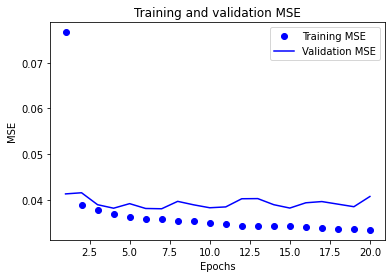

In [ ]:
epochs = range(1, len(hist["mse"]) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, hist["mse"], 'bo', label='Training MSE')
# b는 "파란 실선"입니다
plt.plot(epochs, hist["val_mse"], 'b', label='Validation MSE')
plt.title('Training and validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.show()

In [23]:
timeline = range(len(data4rad_D_obs_pd2)-88,len(data4rad_D_obs_pd2))

pred_data = model_D.predict(data4rad_np_x2)

In [24]:
Y = np.array(data4rad_D_obs_pd2["dangjin"])
Y[timeline]

array([0.        , 0.07266436, 0.32295271, 0.54901961, 0.69665513,
       0.75663206, 0.76124567, 0.71626298, 0.44175317, 0.16262976,
       0.02998847, 0.        , 0.04036909, 0.11764706, 0.33679354,
       0.48673587, 0.59861592, 0.68858131, 0.66089965, 0.46136101,
       0.14071511, 0.01153403, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.03806228, 0.03460208,
       0.00230681, 0.00461361, 0.        , 0.        , 0.06805075,
       0.2272203 , 0.58708189, 0.73125721, 0.7716263 , 0.73587082,
       0.58477509, 0.39907728, 0.17762399, 0.01384083, 0.        ,
       0.03575548, 0.01384083, 0.00230681, 0.14763552, 0.46366782,
       0.68742791, 0.65859285, 0.3183391 , 0.09457901, 0.0011534 ,
       0.        , 0.09342561, 0.29527105, 0.47174164, 0.5916955 ,
       0.81199539, 0.9077278 , 0.87081892, 0.70588235, 0.3183391 ,
       0.0449827 , 0.        , 0.        , 0.0438293 , 0.11649366,
       0.44290657, 0.71164937, 0.77970012, 0.75663206, 0.59746

In [25]:
timeline2 = range(len(data4rad_D_obs_pd2)-22,len(data4rad_D_obs_pd2))

pred_data[-1]

array([0.11110683, 0.06143405, 0.13861755, 0.26422524, 0.3783526 ,
       0.5102398 , 0.5964172 , 0.6058276 , 0.5493283 , 0.42946887,
       0.2710058 , 0.1274025 , 0.099664  , 0.17345168, 0.29072452,
       0.39847636, 0.5171972 , 0.5961781 , 0.5945755 , 0.5557418 ,
       0.4159264 , 0.24794373], dtype=float32)

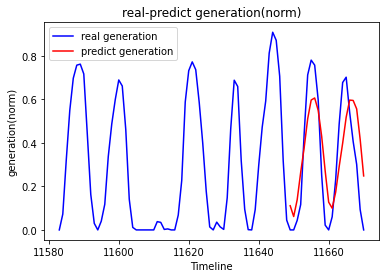

In [28]:
plt.plot(timeline,Y[timeline],"b",label = "real generation")
plt.plot(timeline2,pred_data[-1],"r", label = "predict generation")
plt.title('real-predict generation(norm)')
plt.xlabel('Timeline')
plt.ylabel('generation(norm)')
plt.legend()
plt.show()

In [29]:
pred_data[-1]*(max_D-min_D)+min_D

array([ 96.32962 ,  53.263317, 120.18141 , 229.08328 , 328.0317  ,
       442.3779  , 517.0937  , 525.25256 , 476.26767 , 372.34952 ,
       234.96204 , 110.45797 ,  86.40869 , 150.3826  , 252.05815 ,
       345.479   , 448.40997 , 516.8864  , 515.497   , 481.82812 ,
       360.6082  , 214.96721 ], dtype=float32)

# 4. 예측

In [47]:
data_pred_D = pd.read_csv("./Data/예측_서산.csv",encoding="utf-8")
data_pred_U = pd.read_csv("./Data/예측_울산2 (1).csv",encoding="utf-8")

In [36]:
data_pred_D

,지점,지점명,일시,기온(°C),풍속(m/s),습도(%),일사(MJ/m2)
0,129,서산,2021-01-25 0:00,2.9,0.0,81.0,NaN
1,129,서산,2021-01-25 1:00,2.7,1.4,85.0,NaN
2,129,서산,2021-01-25 2:00,2.2,0.5,82.0,NaN
3,129,서산,2021-01-25 3:00,2.4,0.5,84.0,NaN
4,129,서산,2021-01-25 4:00,5.2,1.1,72.0,NaN
...,...,...,...,...,...,...,...
3164,129,서산,2021-06-05 20:00,19.1,3.0,90.0,0.03
3165,129,서산,2021-06-05 21:00,18.9,2.8,91.0,NaN
3166,129,서산,2021-06-05 22:00,18.8,1.7,92.0,NaN
3167,129,서산,2021-06-05 23:00,18.5,3.1,94.0,NaN


In [28]:
data_pred_U

,Unnamed: 0,지점,지점명,일시,기온(°C),풍속(m/s),습도(%),경주일사
0,0,152,울산,2021-01-25 00:00:00,9.0,1.5,67,NaN
1,1,152,울산,2021-01-25 01:00:00,8.9,1.4,64,NaN
2,2,152,울산,2021-01-25 02:00:00,8.6,1.9,65,NaN
3,3,152,울산,2021-01-25 03:00:00,8.4,1.6,66,NaN
4,4,152,울산,2021-01-25 04:00:00,8.1,2.6,69,NaN
...,...,...,...,...,...,...,...,...
3164,3164,152,울산,2021-06-05 20:00:00,23.3,4.1,71,0.04
3165,3165,152,울산,2021-06-05 21:00:00,21.1,1.5,83,NaN
3166,3166,152,울산,2021-06-05 22:00:00,21.8,2.8,77,NaN
3167,3167,152,울산,2021-06-05 23:00:00,21.4,3.4,78,NaN


In [29]:
sel_D_variable = ["기온(°C)",'습도(%)','풍속(m/s)','일사(MJ/m2)']
sel_U_variable = ["기온(°C)",'습도(%)','풍속(m/s)','경주일사']

In [ ]:
data_pred_D["일시"] = pd.to_datetime(data_pred_D["일시"])
data_pred_D["시간"] = data_pred_D["일시"].dt.hour #예측하는 시점의 '시'만 떼서 넣을 예정

#8시에서 18시까지만
day_idx1 = data_pred_D["시간"] >= 8
day_idx2 = data_pred_D["시간"] <= 18
data_pred_D = data_pred_D[day_idx1]
data_pred_D = data_pred_D[day_idx2]

data_pred_D = data_pred_D[sel_D_variable]

for i in sel_D_variable:
  data_pred_D = data_pred_D[data_pred_D[i].notna()]

for i in sel_D_variable:
  min_x = min(data_pred_D[i])
  max_x = max(data_pred_D[i])
  diff_ = max_x - min_x

  data_pred_D[i] = data_pred_D[i]-min_x
  data_pred_D[i] = data_pred_D[i]/diff_

In [73]:
data_pred_U["일시"] = pd.to_datetime(data_pred_U["일시"])
data_pred_U["시간"] = data_pred_U["일시"].dt.hour #예측하는 시점의 '시'만 떼서 넣을 예정

#8시에서 18시까지만
day_idx1 = data_pred_U["시간"] >= 8
day_idx2 = data_pred_U["시간"] <= 18
data_pred_U = data_pred_U[day_idx1]
data_pred_U = data_pred_U[day_idx2]

data_pred_U = data_pred_U[sel_U_variable]

for i in sel_U_variable:
  data_pred_U = data_pred_U[data_pred_U[i].notna()]

for i in sel_U_variable:
  min_x = min(data_pred_U[i])
  max_x = max(data_pred_U[i])
  diff_ = max_x - min_x

  data_pred_U[i] = data_pred_U[i]-min_x
  data_pred_U[i] = data_pred_U[i]/diff_

In [49]:
for idx in sel_D_variable:
  print(idx,end=" : ")
  print(sum(data_pred_D[idx].isna()))

print(len(data_pred_D))

기온(°C) : 0
습도(%) : 0
풍속(m/s) : 0
일사(MJ/m2) : 0
1451


In [74]:
for idx in sel_U_variable:
  print(idx,end=" : ")
  print(sum(data_pred_U[idx].isna()))

print(len(data_pred_U))

기온(°C) : 0
습도(%) : 0
풍속(m/s) : 0
경주일사 : 0
1452


In [50]:
feature_list = []
for i in range(len(data_pred_D) -77 -22):
  feature_list.append(np.array(data_pred_D.iloc[i:i+77]))
data_pred_D_np = np.array(feature_list)


In [75]:
feature_list = []
for i in range(len(data_pred_U) -77 -22):
  feature_list.append(np.array(data_pred_U.iloc[i:i+77]))
data_pred_U_np = np.array(feature_list)

In [51]:
data_pred_D_np.shape

(1352, 77, 4)

In [76]:
data_pred_U_np.shape

(1353, 77, 4)

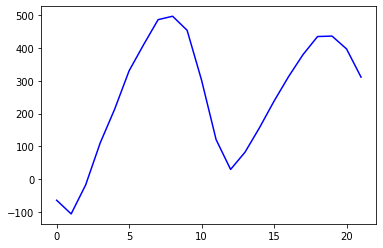

In [53]:
pred_data_D = model_D.predict(data_pred_D_np)

plt.plot(range(22),pred_data_D[-1]*(max_D-min_D)+min_D,"b")
plt.show()

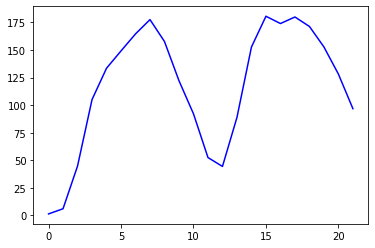

In [77]:
pred_data_U = model_U.predict(data_pred_U_np)

plt.plot(range(22),pred_data_U[-1]*(max_U-min_U)+min_U,"b")
plt.show()

In [78]:
pred_data_U.shape

(1353, 22)

In [68]:
def pred_process(pred_data,length):
  pred_ = pred_data
  l = length

  pred_final = []
  for idx in range(l-1):
    pred_final.append(pred_[idx][0])
  pred_final.extend(pred_[-1])

  pred_final = np.array(pred_final)
  return pred_final

In [79]:
pred_final_D = pred_process(pred_data_D,1352)
pred_final_U = pred_process(pred_data_U,1353)

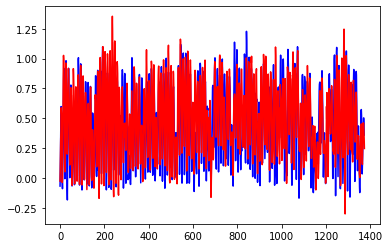

In [81]:
plt.plot(range(1373),pred_final_D,"b")
plt.plot(range(1374),pred_final_U,"r")
plt.show()

되돌리기

In [82]:
pred_data_DF = model_DF.predict(data_pred_D_np)
pred_data_DW = model_DW.predict(data_pred_D_np)

print(pred_data_DF.shape)
print(pred_data_DW.shape)

(1352, 22)
(1352, 22)


In [83]:
pred_final_DF = pred_process(pred_data_DF,1352)
pred_final_DW = pred_process(pred_data_DW,1352)

In [88]:
pred_final_D = pred_final_D*(max_D-min_D)+min_D
pred_final_DF = pred_final_DF*(max_DF-min_DF)+min_DF
pred_final_DW = pred_final_DW*(max_DW-min_DW)+min_DW
pred_final_U = pred_final_U*(max_U-min_U)+min_U

In [93]:
pred_final_U.shape

(1374,)

# 5. 예측값 파일에 넣기

In [126]:
final_file = pd.read_csv("test_sample_submission (1).csv")
#final_file.head(30)

In [98]:
Feb_D = pred_final_D[range(28*11)]
Feb_DF = pred_final_DF[range(28*11)]
Feb_DW = pred_final_DW[range(28*11)]
Feb_U = pred_final_U[range(28*11)]

June_D = pred_final_D[range(-7*11,len(pred_final_D))]
June_DF = pred_final_DF[range(-7*11,len(pred_final_DF))]
June_DW = pred_final_DW[range(-7*11,len(pred_final_DW))]
June_U = pred_final_U[range(-7*11,len(pred_final_U))]

In [118]:
Feb_DF[range(11)]

array([ 10.493739,  73.06344 , 183.01208 , 335.3641  , 490.6193  ,
       485.2673  , 383.68048 , 330.9097  , 209.71841 ,  57.42071 ,
        38.214108], dtype=float32)

In [127]:
#1 2 3 4 5 6 7 (8 9 10 11 12 13 14 15 16 17 18) 19 20 21 22 23 0
for i in range(28):
  k=0
  for j in range(24):
    if 8 <= j and j <= 18 :
      final_file["dangjin_floating"][i*24+j-1] = Feb_DF[i*11+k]
      final_file["dangjin_warehouse"][i*24+j-1] = Feb_DW[i*11+k]
      final_file["dangjin"][i*24+j-1] = Feb_D[i*11+k]
      final_file["ulsan"][i*24+j-1] = Feb_U[i*11+k]
      k = k + 1

for i in range(7):
  k=0
  for j in range(24):
    if 8 <= j and j <= 18 :
      final_file["dangjin_floating"][672+i*24+j-1] = June_DF[i*11+k]
      final_file["dangjin_warehouse"][672+i*24+j-1] = June_DW[i*11+k]
      final_file["dangjin"][672+i*24+j-1] = June_D[i*11+k]
      final_file["ulsan"][672+i*24+j-1] = June_U[i*11+k]
      k = k + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value

In [123]:
i*24+j-1

670

In [121]:
final_file.head(30)

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2021-02-01 01:00:00,0,0,0,0
1,2021-02-01 02:00:00,0,0,0,0
2,2021-02-01 03:00:00,0,0,0,0
3,2021-02-01 04:00:00,0,0,0,0
4,2021-02-01 05:00:00,0,0,0,0
5,2021-02-01 06:00:00,0,0,0,0
6,2021-02-01 07:00:00,0,0,0,0
7,2021-02-01 08:00:00,10,-55,-59,-10
8,2021-02-01 09:00:00,73,22,36,25
9,2021-02-01 10:00:00,183,117,165,84


In [128]:
final_file.to_csv("final.csv",mode="w",index=False)